Ratio plot with different outputs. We have seven different outputs from the fraction radiation length ($x/X_0$) vs Pseudorapidity($\eta$). We tried to figure out how the output from different CMSSW affect on the material validation outputs. This comparison is only for **Geometry2016**. 

In [3]:
import numpy as np
import ROOT 
import uproot  # We have not used it but there could be another way to oen a root file, https://uproot.readthedocs.io/en/latest/basic.html 
import os       
import matplotlib.pyplot as plt 
# %matplotlib  #https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html 
# %matplotlib widget
from ROOT import TFile, TCanvas, TPad, TPaveLabel, TPaveText, TTree, TH1F, TF1
# from root_numpy import root2array, tree2array, array2tree, array2root
import sys
from ROOT import gROOT, AddressOf
from ROOT import TColor
from ROOT import kBlack, kBlue, kRed, kViolet
from ROOT import TCanvas, TColor, TGaxis, TH1F, TPad

# from root_numpy import root2array, rec2array

In [2]:
ROOT.gROOT.SetBatch()
ROOT.gStyle.SetOptStat(0)

#  Files 

In [6]:
infile_12 = ROOT.TFile ("/afs/cern.ch/user/s/sraj/GeometryTask/CMSSW_12_4_14/src/Validation/Geometry/test/matbdg_Tracker_Extended2016.root "," READ ")
infile_12.ls();

TFile**		/afs/cern.ch/user/s/sraj/GeometryTask/CMSSW_12_4_14/src/Validation/Geometry/test/matbdg_Tracker_Extended2016.root	
 TFile*		/afs/cern.ch/user/s/sraj/GeometryTask/CMSSW_12_4_14/src/Validation/Geometry/test/matbdg_Tracker_Extended2016.root	
  KEY: TH1F	11;1	Eta 
  KEY: TH1F	21;1	Phi 
  KEY: TH1F	41;1	R 
  KEY: TH1F	111;1	Eta [Support]
  KEY: TH1F	121;1	Phi [Support]
  KEY: TH1F	141;1	R [Support]
  KEY: TH1F	211;1	Eta [Sensitive]
  KEY: TH1F	221;1	Phi [Sensitive]
  KEY: TH1F	241;1	R [Sensitive]
  KEY: TH1F	311;1	Eta [Cables]
  KEY: TH1F	321;1	Phi [Cables]
  KEY: TH1F	341;1	R [Cables]
  KEY: TH1F	411;1	Eta [Cooling]
  KEY: TH1F	421;1	Phi [Cooling]
  KEY: TH1F	441;1	R [Cooling]
  KEY: TH1F	511;1	Eta [Electronics]
  KEY: TH1F	521;1	Phi [Electronics]
  KEY: TH1F	541;1	R [Electronics]
  KEY: TH1F	611;1	Eta [Other]
  KEY: TH1F	621;1	Phi [Other]
  KEY: TH1F	641;1	R [Other]
  KEY: TH1F	711;1	Eta [Air]
  KEY: TH1F	721;1	Phi [Air]
  KEY: TH1F	741;1	R [Air]
  KEY: TH1F	1011;1	Eta 
  KEY: TH

In [4]:
infile_10 = ROOT.TFile("/eos/user/s/sraj/Work_/CUA_20--/Project_Material_Validation_V1/matbdg_Tracker_Extended2016.root")
infile_10.ls();

TFile**		/eos/user/s/sraj/Work_/CUA_20--/Project_Material_Validation_V1/matbdg_Tracker_Extended2016.root	
 TFile*		/eos/user/s/sraj/Work_/CUA_20--/Project_Material_Validation_V1/matbdg_Tracker_Extended2016.root	
  KEY: TH1F	11;1	Eta 
  KEY: TH1F	21;1	Phi 
  KEY: TH1F	41;1	R 
  KEY: TH1F	111;1	Eta [Support]
  KEY: TH1F	121;1	Phi [Support]
  KEY: TH1F	141;1	R [Support]
  KEY: TH1F	211;1	Eta [Sensitive]
  KEY: TH1F	221;1	Phi [Sensitive]
  KEY: TH1F	241;1	R [Sensitive]
  KEY: TH1F	311;1	Eta [Cables]
  KEY: TH1F	321;1	Phi [Cables]
  KEY: TH1F	341;1	R [Cables]
  KEY: TH1F	411;1	Eta [Cooling]
  KEY: TH1F	421;1	Phi [Cooling]
  KEY: TH1F	441;1	R [Cooling]
  KEY: TH1F	511;1	Eta [Electronics]
  KEY: TH1F	521;1	Phi [Electronics]
  KEY: TH1F	541;1	R [Electronics]
  KEY: TH1F	611;1	Eta [Other]
  KEY: TH1F	621;1	Phi [Other]
  KEY: TH1F	641;1	R [Other]
  KEY: TH1F	711;1	Eta [Air]
  KEY: TH1F	721;1	Phi [Air]
  KEY: TH1F	741;1	R [Air]
  KEY: TH1F	1011;1	Eta 
  KEY: TH1F	1021;1	Phi 
  KEY: TH1F	1041;1	R 

# 1. Ratio Plots for Cooling

Warning in <TFile::Append>: Replacing existing TH1: totalMC (Potential memory leak).
Warning in <TH1::TH1>: nbins is <=0 - set to nbins = 1
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file /eos/user/s/sraj/Work_/CUA_20--/Project_Material_Validation_V1/Comparision_CMSSW-10_&_CMSSW-12/Geometry2016/Cooling_comaprision_CMSSW_10&12.pdf has been created
Info in <TCanvas::Print>: png file /eos/user/s/sraj/Work_/CUA_20--/Project_Material_Validation_V1/Comparision_CMSSW-10_&_CMSSW-12/Geometry2016/Cooling_comaprision_CMSSW_10&12.png has been created


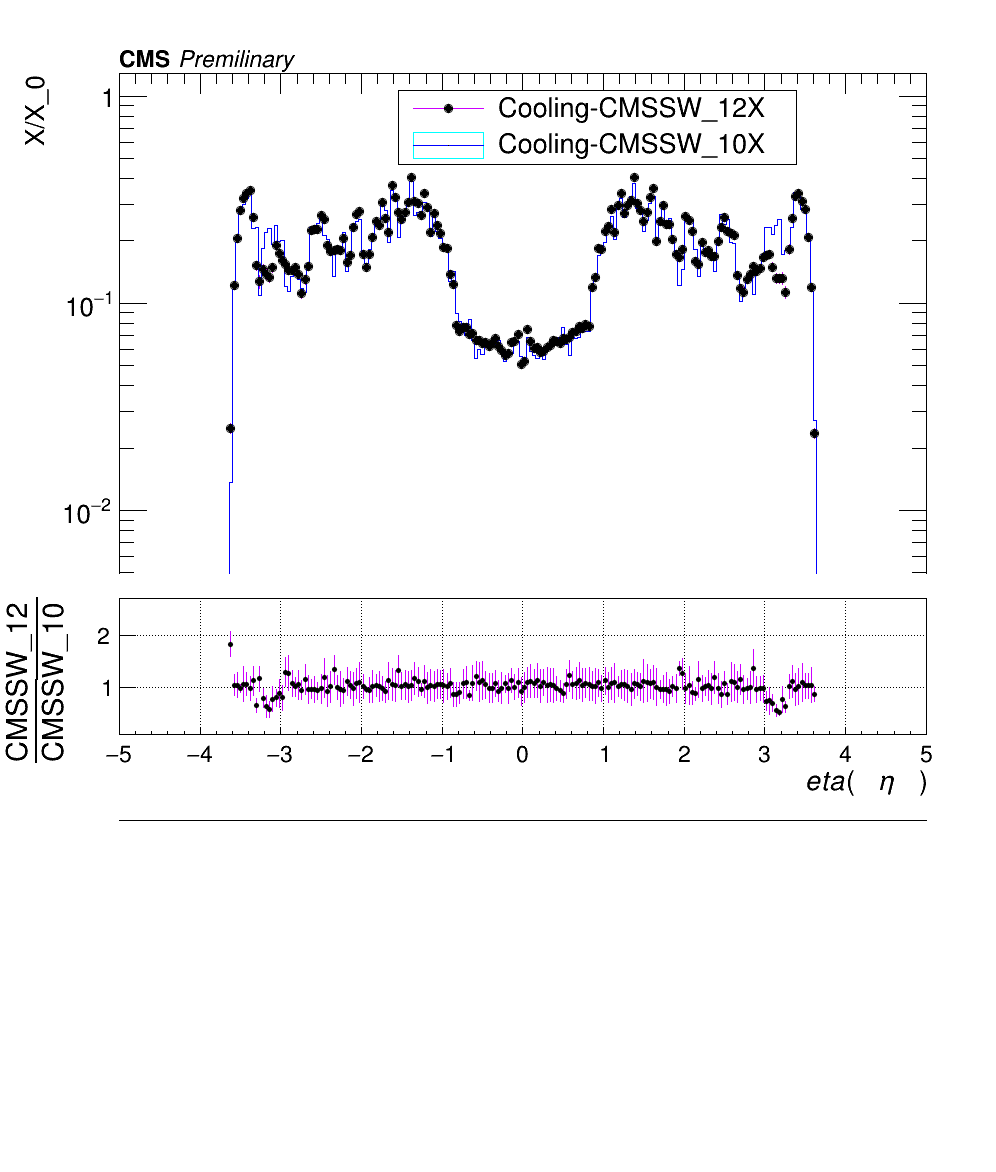

In [8]:
hist_12_cooling = infile_12.Get("410")
hist_10_cooling = infile_10.Get("410")


hist_12_cooling.SetMarkerStyle(20)
hist_12_cooling.SetMarkerSize(1)
hist_12_cooling.SetMarkerColor(kBlack)
hist_12_cooling.SetLineWidth(1)
hist_12_cooling.SetLineColor(kViolet)
# hist_12_cooling.GetYaxis().SetRangeUser(0.001,1)


totalMC= ROOT.TH1F("totalMC", "Events;DNN score;",-5,5,250)
totalMC.Add(hist_10_cooling)
totalMCYield=totalMC.Integral()
DataYield= hist_12_cooling.Integral()
DataMC_scaleF=DataYield/totalMCYield  


hist_10_cooling.Scale(DataMC_scaleF)

hist_10_cooling.SetFillColor(7)
hist_10_cooling.SetLineColor(kBlue);
# hist_10_cooling.GetYaxis().SetRangeUser(0.001, 1)

stack_I = ROOT.THStack("","")
stack_I.Add(hist_10_cooling)



hRatio = hist_12_cooling.Clone("hRatio");
hRatio.Reset();
hRatio.Add(hist_12_cooling);
hRatio.Divide(hist_10_cooling);
hRatio.SetStats(0);
hRatio.SetMarkerStyle(20);
hRatio.SetMarkerSize(1);
hRatio.SetTitle("");


hRatio.GetYaxis().SetRangeUser(0.1,2.7);
hRatio.GetYaxis().SetTitleOffset(0.4);
hRatio.GetYaxis().SetTitleSize(0.13);
hRatio.GetXaxis().SetTitleSize(0.12);
hRatio.GetXaxis().SetLabelSize(0.10);
hRatio.GetYaxis().SetLabelSize(0.10);
hRatio.GetYaxis().SetTitle("#frac{CMSSW_12}{CMSSW_10}");
hRatio.GetXaxis().SetTitle("eta($\eta$)");
hRatio.GetXaxis().SetLabelOffset(0.035);
hRatio.GetYaxis().SetLabelOffset(0.01);
hRatio.GetYaxis().SetNdivisions(5);
hRatio.SetMarkerStyle(19);
hRatio.SetMarkerSize(0.5);
hRatio.SetMarkerColor(kBlack);
# hRatio.Fit("pol1")   #It shows the fit 

c1 = ROOT.TCanvas('c1',"",1000,1200)
pad1 = ROOT.TPad("pad1","pad1",0,0.3,1.0,1.0);
pad1.SetTopMargin(0.090);
pad1.SetBottomMargin(0);
pad1.SetLeftMargin(0.120);
pad1.SetRightMargin(0.070);
pad1.SetLogy();
pad1.SetTickx();
pad1.SetTicky();
pad1.Draw();
pad1.cd();

tex1 = ROOT.TLatex(0.12, 0.94, "#bf{CMS} #it{Premilinary}")
tex1.SetNDC()
tex1.SetTextAlign(13)
tex1.SetTextFont(42)
tex1.SetTextSize(0.03)
tex1.SetLineWidth(2)

tex2 = ROOT.TLatex(0.72, 0.94, "137 fb^{-1} (13 TeV)")
tex2.SetNDC()
tex2.SetTextAlign(13)
tex2.SetTextFont(42)
tex2.SetTextSize(0.03)
tex2.SetLineWidth(2)

stack_I.Draw("hist")
stack_I.GetYaxis().SetTitle("X/X_0");
# stack_I.GetYaxis().SetRangeUser(0.001, 1)
stack_I.SetMaximum(0.8)


hist_12_cooling.Draw("E0 x0 SAME")

# Legend drawing
legend = ROOT.TLegend()
legend = ROOT.TLegend(0.40,0.80,0.80,0.89)
legend.AddEntry(hist_12_cooling, "Cooling-CMSSW_12X")
legend.AddEntry(hist_10_cooling, "Cooling-CMSSW_10X")

# canvas.SetLogy()
legend.Draw()
# canvas.Draw()

tex1.Draw()



pad2 = TPad("pad2","pad2",0,0,1,0.3);
pad2.SetTopMargin(0.1);
pad2.SetLeftMargin(0.120);
pad2.SetRightMargin(0.070);
pad2.SetBottomMargin(0.35);
pad2.SetGridy();
pad2.SetGridx();
pad2.Draw();
pad2.cd();

hRatio.Draw("E0 x0");
c1.Draw()
c1.SaveAs("/eos/user/s/sraj/Work_/CUA_20--/Project_Material_Validation_V1/Comparision_CMSSW-10_&_CMSSW-12/Geometry2016/Cooling_comaprision_CMSSW_10&12.pdf")
c1.SaveAs("/eos/user/s/sraj/Work_/CUA_20--/Project_Material_Validation_V1/Comparision_CMSSW-10_&_CMSSW-12/Geometry2016/Cooling_comaprision_CMSSW_10&12.png")

# 2. Ratio Plot for Cables

Warning in <TFile::Append>: Replacing existing TH1: totalMC (Potential memory leak).
Warning in <TH1::TH1>: nbins is <=0 - set to nbins = 1
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file /eos/user/s/sraj/Work_/CUA_20--/Project_Material_Validation_V1/Comparision_CMSSW-10_&_CMSSW-12/Geometry2016/Cables_comaprision_CMSSW_10&12.pdf has been created
Info in <TCanvas::Print>: png file /eos/user/s/sraj/Work_/CUA_20--/Project_Material_Validation_V1/Comparision_CMSSW-10_&_CMSSW-12/Geometry2016/Cables_comaprision_CMSSW_10&12.png has been created


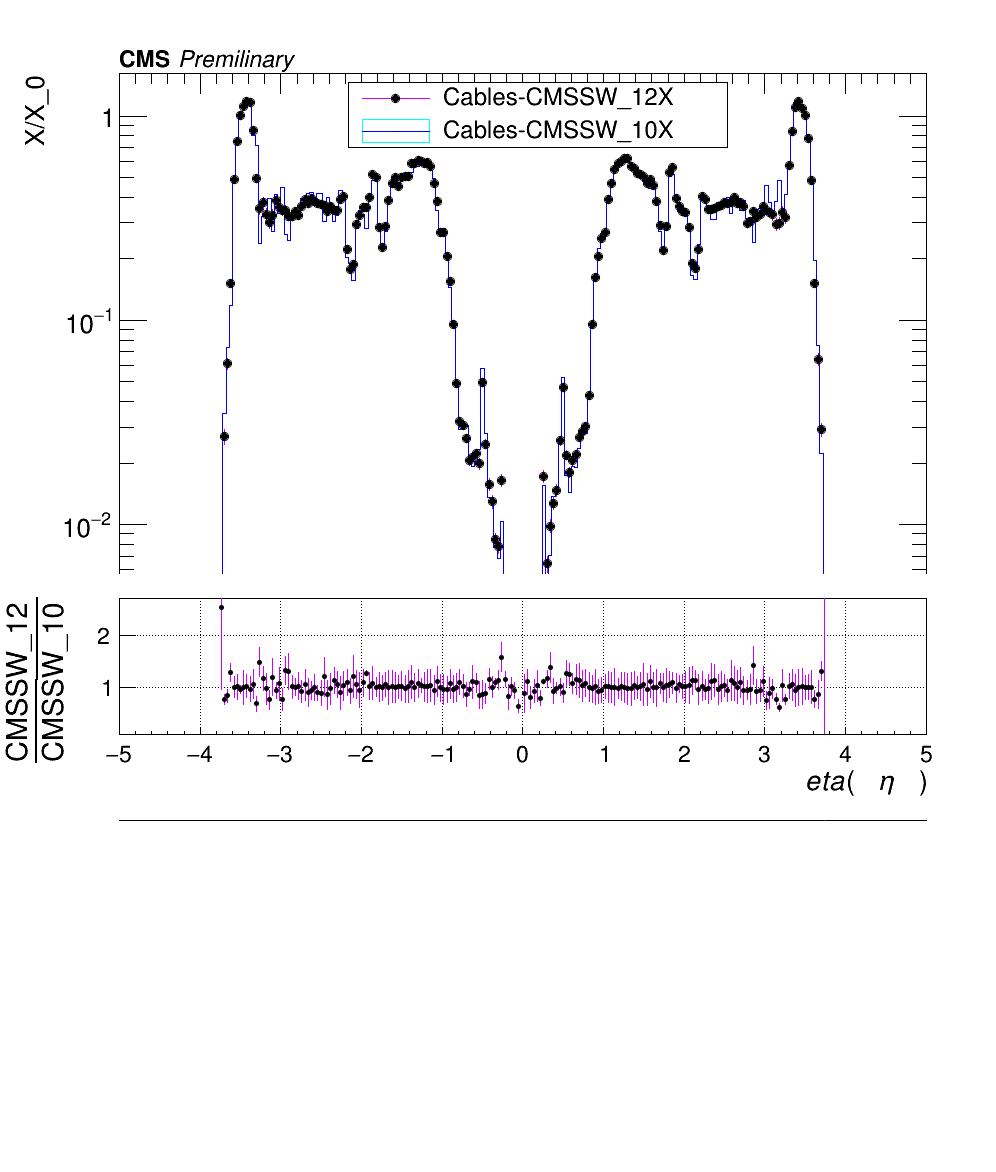

In [9]:
hist_12_cooling = infile_12.Get("310")
hist_10_cooling = infile_10.Get("310")


hist_12_cooling.SetMarkerStyle(20)
hist_12_cooling.SetMarkerSize(1)
hist_12_cooling.SetMarkerColor(kBlack)
hist_12_cooling.SetLineWidth(1)
hist_12_cooling.SetLineColor(kViolet)
# hist_12_cooling.GetYaxis().SetRangeUser(0.001,1)


totalMC= ROOT.TH1F("totalMC", "Events;DNN score;",-5,5,250)
totalMC.Add(hist_10_cooling)
totalMCYield=totalMC.Integral()
DataYield= hist_12_cooling.Integral()
DataMC_scaleF=DataYield/totalMCYield  


hist_10_cooling.Scale(DataMC_scaleF)

hist_10_cooling.SetFillColor(7)
hist_10_cooling.SetLineColor(kBlue);
hist_10_cooling.GetYaxis().SetRangeUser(0.001, 1)

stack_I = ROOT.THStack("","")
stack_I.Add(hist_10_cooling)



hRatio = hist_12_cooling.Clone("hRatio");
hRatio.Reset();
hRatio.Add(hist_12_cooling);
hRatio.Divide(hist_10_cooling);
hRatio.SetStats(0);
hRatio.SetMarkerStyle(20);
hRatio.SetMarkerSize(1);
hRatio.SetTitle("");


hRatio.GetYaxis().SetRangeUser(0.1,2.7);
hRatio.GetYaxis().SetTitleOffset(0.4);
hRatio.GetYaxis().SetTitleSize(0.13);
hRatio.GetXaxis().SetTitleSize(0.12);
hRatio.GetXaxis().SetLabelSize(0.10);
hRatio.GetYaxis().SetLabelSize(0.10);
hRatio.GetYaxis().SetTitle("#frac{CMSSW_12}{CMSSW_10}");
hRatio.GetXaxis().SetTitle("eta($\eta$)");
hRatio.GetXaxis().SetLabelOffset(0.035);
hRatio.GetYaxis().SetLabelOffset(0.01);
hRatio.GetYaxis().SetNdivisions(5);
hRatio.SetMarkerStyle(19);
hRatio.SetMarkerSize(0.5);
hRatio.SetMarkerColor(kBlack);
# hRatio.Fit("pol1")   #It shows the fit 

c1 = ROOT.TCanvas('c1',"",1000,1200)
pad1 = ROOT.TPad("pad1","pad1",0,0.3,1.0,1.0);
pad1.SetTopMargin(0.090);
pad1.SetBottomMargin(0);
pad1.SetLeftMargin(0.120);
pad1.SetRightMargin(0.070);
pad1.SetLogy();
pad1.SetTickx();
pad1.SetTicky();
pad1.Draw();
pad1.cd();

tex1 = ROOT.TLatex(0.12, 0.94, "#bf{CMS} #it{Premilinary}")
tex1.SetNDC()
tex1.SetTextAlign(13)
tex1.SetTextFont(42)
tex1.SetTextSize(0.03)
tex1.SetLineWidth(2)

tex2 = ROOT.TLatex(0.72, 0.94, "137 fb^{-1} (13 TeV)")
tex2.SetNDC()
tex2.SetTextAlign(13)
tex2.SetTextFont(42)
tex2.SetTextSize(0.03)
tex2.SetLineWidth(2)

stack_I.Draw("hist")
stack_I.GetYaxis().SetTitle("X/X_0");
# stack_I.GetYaxis().SetRangeUser(0.001, 1)
stack_I.SetMaximum(1.0)


hist_12_cooling.Draw("E0 x0 SAME")

# Legend drawing
legend = ROOT.TLegend()
legend = ROOT.TLegend(0.35,0.82,0.73,0.90)
legend.AddEntry(hist_12_cooling, "Cables-CMSSW_12X")
legend.AddEntry(hist_10_cooling, "Cables-CMSSW_10X")

# canvas.SetLogy()
legend.Draw()
# canvas.Draw()

tex1.Draw()



pad2 = TPad("pad2","pad2",0,0,1,0.3);
pad2.SetTopMargin(0.1);
pad2.SetLeftMargin(0.120);
pad2.SetRightMargin(0.070);
pad2.SetBottomMargin(0.35);
pad2.SetGridy();
pad2.SetGridx();
pad2.Draw();
pad2.cd();

hRatio.Draw("E0 x0");
c1.Draw()
c1.SaveAs("/eos/user/s/sraj/Work_/CUA_20--/Project_Material_Validation_V1/Comparision_CMSSW-10_&_CMSSW-12/Geometry2016/Cables_comaprision_CMSSW_10&12.pdf")
c1.SaveAs("/eos/user/s/sraj/Work_/CUA_20--/Project_Material_Validation_V1/Comparision_CMSSW-10_&_CMSSW-12/Geometry2016/Cables_comaprision_CMSSW_10&12.png")

# Ratio Plot for Electronics

Warning in <TFile::Append>: Replacing existing TH1: totalMC (Potential memory leak).
Warning in <TH1::TH1>: nbins is <=0 - set to nbins = 1
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file /eos/user/s/sraj/Work_/CUA_20--/Project_Material_Validation_V1/Comparision_CMSSW-10_&_CMSSW-12/Geometry2016/Electronics_comaprision_CMSSW_10&12.pdf has been created
Info in <TCanvas::Print>: png file /eos/user/s/sraj/Work_/CUA_20--/Project_Material_Validation_V1/Comparision_CMSSW-10_&_CMSSW-12/Geometry2016/Electronics_comaprision_CMSSW_10&12.png has been created


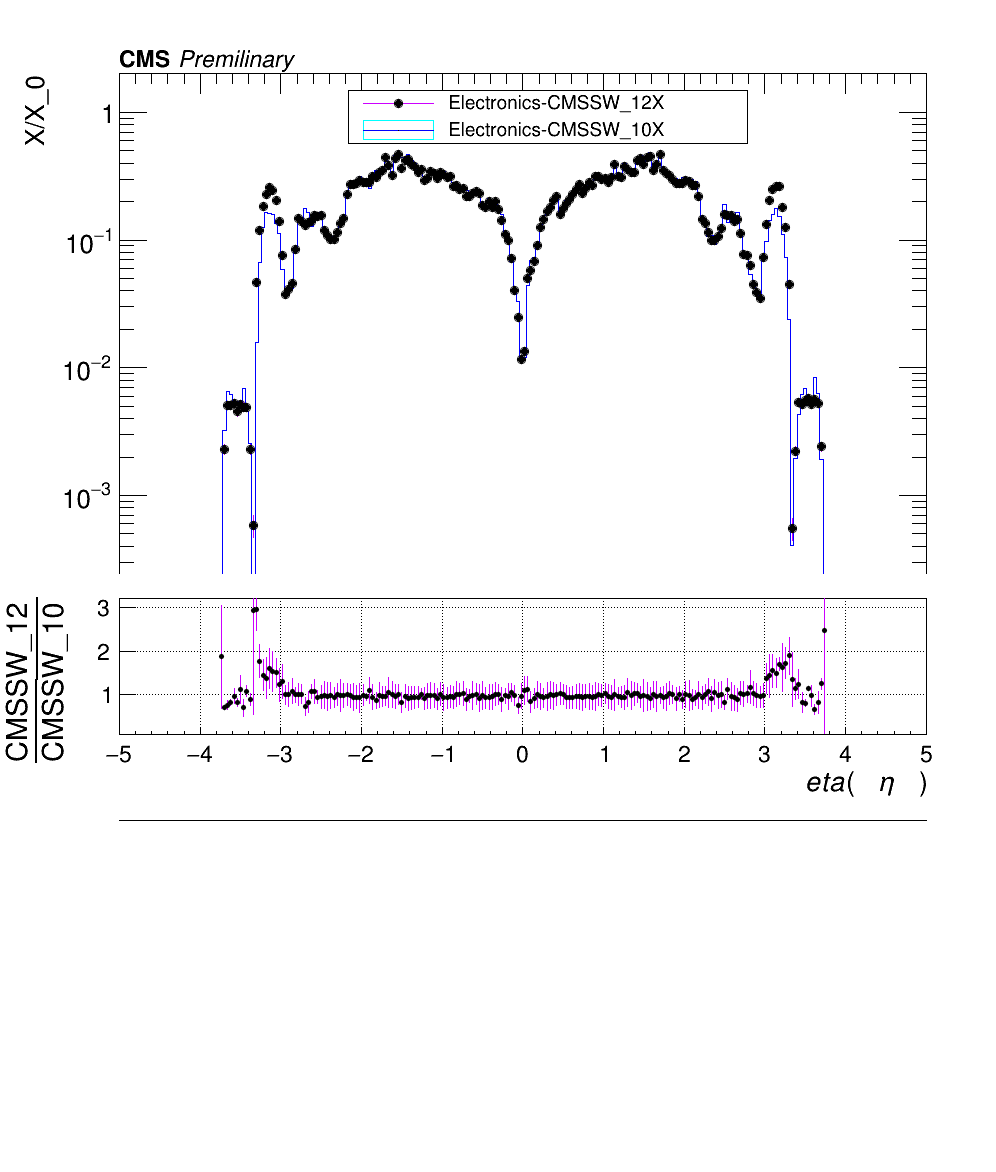

In [13]:
hist_12_cooling = infile_12.Get("510")
hist_10_cooling = infile_10.Get("510")


hist_12_cooling.SetMarkerStyle(20)
hist_12_cooling.SetMarkerSize(1)
hist_12_cooling.SetMarkerColor(kBlack)
hist_12_cooling.SetLineWidth(1)
hist_12_cooling.SetLineColor(kViolet)
# hist_12_cooling.GetYaxis().SetRangeUser(0.001,1)


totalMC= ROOT.TH1F("totalMC", "Events;DNN score;",-5,5,250)
totalMC.Add(hist_10_cooling)
totalMCYield=totalMC.Integral()
DataYield= hist_12_cooling.Integral()
DataMC_scaleF=DataYield/totalMCYield  


hist_10_cooling.Scale(DataMC_scaleF)

hist_10_cooling.SetFillColor(7)
hist_10_cooling.SetLineColor(kBlue);
# hist_10_cooling.GetYaxis().SetRangeUser(0.001, 1)

stack_I = ROOT.THStack("","")
stack_I.Add(hist_10_cooling)



hRatio = hist_12_cooling.Clone("hRatio");
hRatio.Reset();
hRatio.Add(hist_12_cooling);
hRatio.Divide(hist_10_cooling);
hRatio.SetStats(0);
hRatio.SetMarkerStyle(20);
hRatio.SetMarkerSize(1);
hRatio.SetTitle("");


hRatio.GetYaxis().SetRangeUser(0.1,3.2);
hRatio.GetYaxis().SetTitleOffset(0.4);
hRatio.GetYaxis().SetTitleSize(0.13);
hRatio.GetXaxis().SetTitleSize(0.12);
hRatio.GetXaxis().SetLabelSize(0.10);
hRatio.GetYaxis().SetLabelSize(0.10);
hRatio.GetYaxis().SetTitle("#frac{CMSSW_12}{CMSSW_10}");
hRatio.GetXaxis().SetTitle("eta($\eta$)");
hRatio.GetXaxis().SetLabelOffset(0.035);
hRatio.GetYaxis().SetLabelOffset(0.01);
hRatio.GetYaxis().SetNdivisions(5);
hRatio.SetMarkerStyle(19);
hRatio.SetMarkerSize(0.5);
hRatio.SetMarkerColor(kBlack);
# hRatio.Fit("pol1")   #It shows the fit 

c1 = ROOT.TCanvas('c1',"",1000,1200)
pad1 = ROOT.TPad("pad1","pad1",0,0.3,1.0,1.0);
pad1.SetTopMargin(0.090);
pad1.SetBottomMargin(0);
pad1.SetLeftMargin(0.120);
pad1.SetRightMargin(0.070);
pad1.SetLogy();
pad1.SetTickx();
pad1.SetTicky();
pad1.Draw();
pad1.cd();

tex1 = ROOT.TLatex(0.12, 0.94, "#bf{CMS} #it{Premilinary}")
tex1.SetNDC()
tex1.SetTextAlign(13)
tex1.SetTextFont(42)
tex1.SetTextSize(0.03)
tex1.SetLineWidth(2)

tex2 = ROOT.TLatex(0.72, 0.94, "137 fb^{-1} (13 TeV)")
tex2.SetNDC()
tex2.SetTextAlign(13)
tex2.SetTextFont(42)
tex2.SetTextSize(0.03)
tex2.SetLineWidth(2)

stack_I.Draw("hist")
stack_I.GetYaxis().SetTitle("X/X_0");
# stack_I.GetYaxis().SetRangeUser(0.001, 1)
stack_I.SetMaximum(1.0)
stack_I.SetMinimum(0.00001)


hist_12_cooling.Draw("E0 x0 SAME")

# Legend drawing
legend = ROOT.TLegend()
legend = ROOT.TLegend(0.35,0.825,0.75,0.89)
legend.AddEntry(hist_12_cooling, "Electronics-CMSSW_12X")
legend.AddEntry(hist_10_cooling, "Electronics-CMSSW_10X")

# canvas.SetLogy()
legend.Draw()
# canvas.Draw()

tex1.Draw()



pad2 = TPad("pad2","pad2",0,0,1,0.3);
pad2.SetTopMargin(0.1);
pad2.SetLeftMargin(0.120);
pad2.SetRightMargin(0.070);
pad2.SetBottomMargin(0.35);
pad2.SetGridy();
pad2.SetGridx();
pad2.Draw();
pad2.cd();

hRatio.Draw("E0 x0");
c1.Draw()
c1.SaveAs("/eos/user/s/sraj/Work_/CUA_20--/Project_Material_Validation_V1/Comparision_CMSSW-10_&_CMSSW-12/Geometry2016/Electronics_comaprision_CMSSW_10&12.pdf")
c1.SaveAs("/eos/user/s/sraj/Work_/CUA_20--/Project_Material_Validation_V1/Comparision_CMSSW-10_&_CMSSW-12/Geometry2016/Electronics_comaprision_CMSSW_10&12.png")

# Ratio Plot for Others

Warning in <TFile::Append>: Replacing existing TH1: totalMC (Potential memory leak).
Warning in <TH1::TH1>: nbins is <=0 - set to nbins = 1
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file /eos/user/s/sraj/Work_/CUA_20--/Project_Material_Validation_V1/Comparision_CMSSW-10_&_CMSSW-12/Geometry2016/Other_comaprision_CMSSW_10&12.pdf has been created
Info in <TCanvas::Print>: png file /eos/user/s/sraj/Work_/CUA_20--/Project_Material_Validation_V1/Comparision_CMSSW-10_&_CMSSW-12/Geometry2016/Other_comaprision_CMSSW_10&12.png has been created


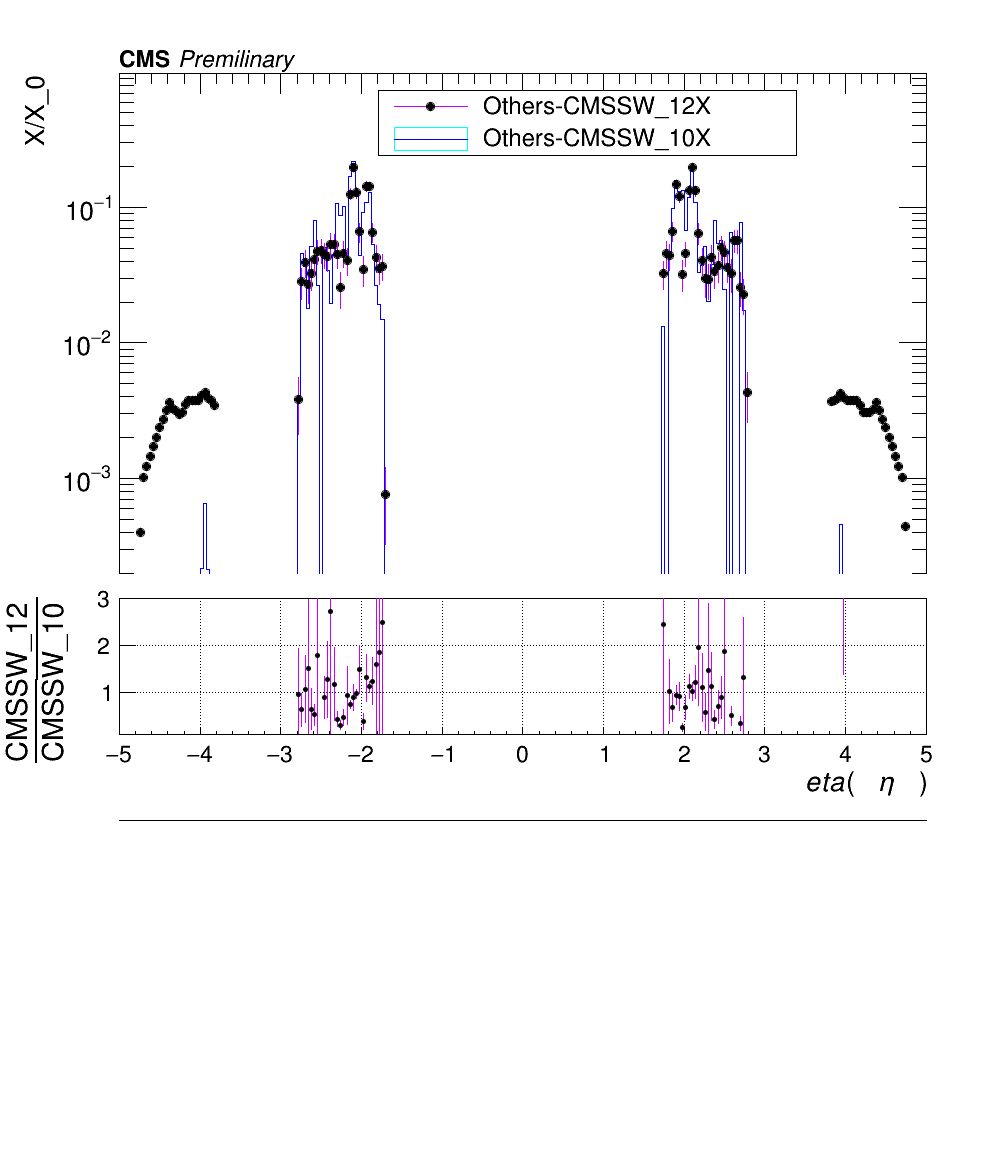

In [15]:
hist_12_cooling = infile_12.Get("610")
hist_10_cooling = infile_10.Get("610")


hist_12_cooling.SetMarkerStyle(20)
hist_12_cooling.SetMarkerSize(1)
hist_12_cooling.SetMarkerColor(kBlack)
hist_12_cooling.SetLineWidth(1)
hist_12_cooling.SetLineColor(kViolet)
# hist_12_cooling.GetYaxis().SetRangeUser(0.001,1)


totalMC= ROOT.TH1F("totalMC", "Events;DNN score;",-5,5,250)
totalMC.Add(hist_10_cooling)
totalMCYield=totalMC.Integral()
DataYield= hist_12_cooling.Integral()
DataMC_scaleF=DataYield/totalMCYield  


hist_10_cooling.Scale(DataMC_scaleF)

hist_10_cooling.SetFillColor(7)
hist_10_cooling.SetLineColor(kBlue);
hist_10_cooling.GetYaxis().SetRangeUser(0.001, 0.1)

stack_I = ROOT.THStack("","")
stack_I.Add(hist_10_cooling)



hRatio = hist_12_cooling.Clone("hRatio");
hRatio.Reset();
hRatio.Add(hist_12_cooling);
hRatio.Divide(hist_10_cooling);
hRatio.SetStats(0);
hRatio.SetMarkerStyle(20);
hRatio.SetMarkerSize(1);
hRatio.SetTitle("");


hRatio.GetYaxis().SetRangeUser(0.1,3);
hRatio.GetYaxis().SetTitleOffset(0.4);
hRatio.GetYaxis().SetTitleSize(0.13);
hRatio.GetXaxis().SetTitleSize(0.12);
hRatio.GetXaxis().SetLabelSize(0.10);
hRatio.GetYaxis().SetLabelSize(0.10);
hRatio.GetYaxis().SetTitle("#frac{CMSSW_12}{CMSSW_10}");
hRatio.GetXaxis().SetTitle("eta($\eta$)");
hRatio.GetXaxis().SetLabelOffset(0.035);
hRatio.GetYaxis().SetLabelOffset(0.01);
hRatio.GetYaxis().SetNdivisions(5);
hRatio.SetMarkerStyle(19);
hRatio.SetMarkerSize(0.5);
hRatio.SetMarkerColor(kBlack);
# hRatio.Fit("pol1")   #It shows the fit 

c1 = ROOT.TCanvas('c1',"",1000,1200)
pad1 = ROOT.TPad("pad1","pad1",0,0.3,1.0,1.0);
pad1.SetTopMargin(0.090);
pad1.SetBottomMargin(0);
pad1.SetLeftMargin(0.120);
pad1.SetRightMargin(0.070);
pad1.SetLogy();
pad1.SetTickx();
pad1.SetTicky();
pad1.Draw();
pad1.cd();

tex1 = ROOT.TLatex(0.12, 0.94, "#bf{CMS} #it{Premilinary}")
tex1.SetNDC()
tex1.SetTextAlign(13)
tex1.SetTextFont(42)
tex1.SetTextSize(0.03)
tex1.SetLineWidth(2)

tex2 = ROOT.TLatex(0.72, 0.94, "137 fb^{-1} (13 TeV)")
tex2.SetNDC()
tex2.SetTextAlign(13)
tex2.SetTextFont(42)
tex2.SetTextSize(0.03)
tex2.SetLineWidth(2)

stack_I.Draw("hist")
stack_I.GetYaxis().SetTitle("X/X_0");
# stack_I.GetYaxis().SetRangeUser(0.001, 1)
stack_I.SetMaximum(0.5)
stack_I.SetMinimum(0.00001)

hist_12_cooling.Draw("E0 x0 SAME")

# Legend drawing
legend = ROOT.TLegend()
legend = ROOT.TLegend(0.38,0.81,0.80,0.89)
legend.AddEntry(hist_12_cooling, "Others-CMSSW_12X")
legend.AddEntry(hist_10_cooling, "Others-CMSSW_10X")

# canvas.SetLogy()
legend.Draw()
# canvas.Draw()

tex1.Draw()



pad2 = TPad("pad2","pad2",0,0,1,0.3);
pad2.SetTopMargin(0.1);
pad2.SetLeftMargin(0.120);
pad2.SetRightMargin(0.070);
pad2.SetBottomMargin(0.35);
pad2.SetGridy();
pad2.SetGridx();
pad2.Draw();
pad2.cd();

hRatio.Draw("E0 x0");
c1.Draw()
c1.SaveAs("/eos/user/s/sraj/Work_/CUA_20--/Project_Material_Validation_V1/Comparision_CMSSW-10_&_CMSSW-12/Geometry2016/Other_comaprision_CMSSW_10&12.pdf")
c1.SaveAs("/eos/user/s/sraj/Work_/CUA_20--/Project_Material_Validation_V1/Comparision_CMSSW-10_&_CMSSW-12/Geometry2016/Other_comaprision_CMSSW_10&12.png")

# Ratio Plot for Air

Warning in <TFile::Append>: Replacing existing TH1: totalMC (Potential memory leak).
Warning in <TH1::TH1>: nbins is <=0 - set to nbins = 1
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file /eos/user/s/sraj/Work_/CUA_20--/Project_Material_Validation_V1/Comparision_CMSSW-10_&_CMSSW-12/Geometry2016/Air_comaprision_CMSSW_10&12.pdf has been created
Info in <TCanvas::Print>: png file /eos/user/s/sraj/Work_/CUA_20--/Project_Material_Validation_V1/Comparision_CMSSW-10_&_CMSSW-12/Geometry2016/Air_comaprision_CMSSW_10&12.png has been created


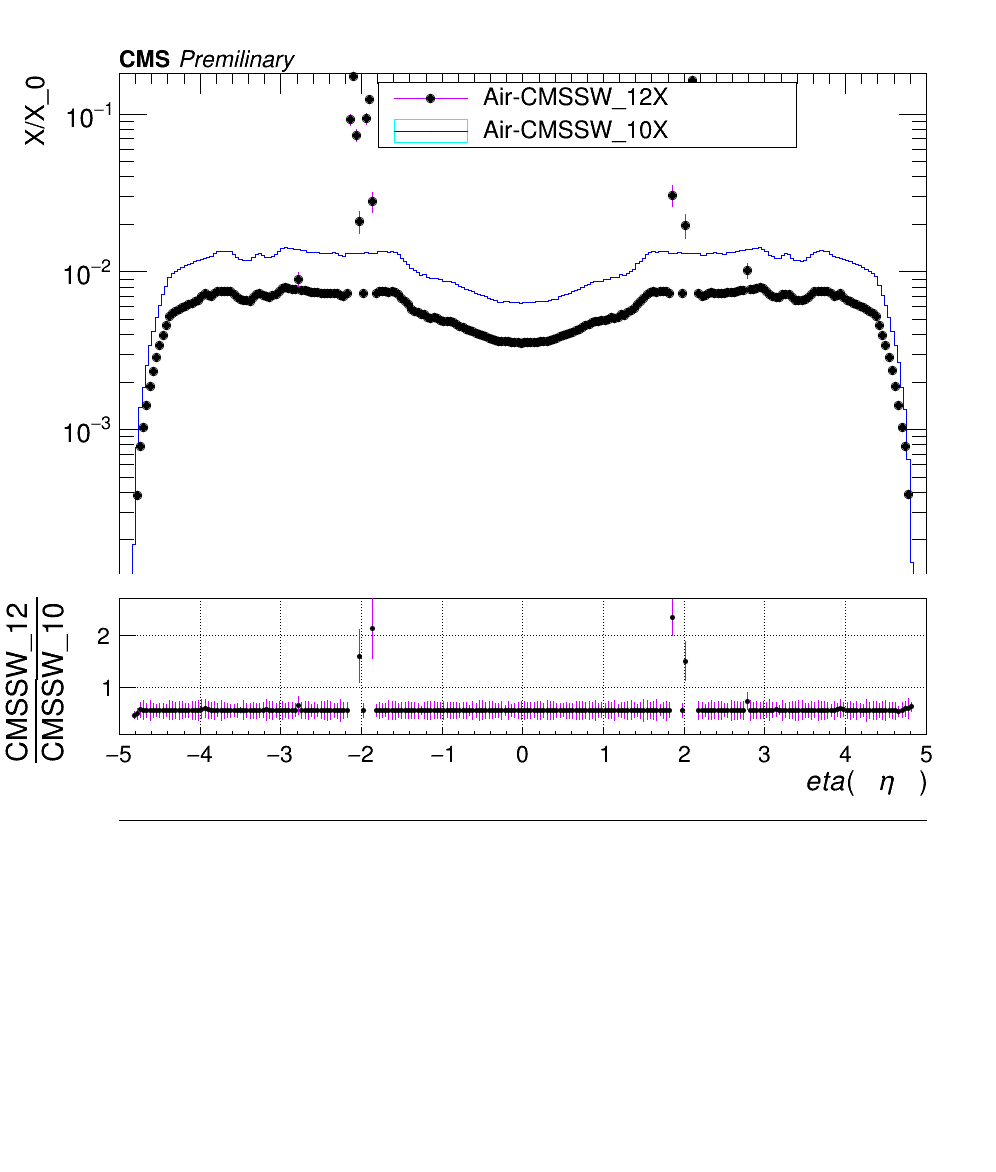

In [17]:
hist_12_cooling = infile_12.Get("710")
hist_10_cooling = infile_10.Get("710")


hist_12_cooling.SetMarkerStyle(20)
hist_12_cooling.SetMarkerSize(1)
hist_12_cooling.SetMarkerColor(kBlack)
hist_12_cooling.SetLineWidth(1)
hist_12_cooling.SetLineColor(kViolet)
# hist_12_cooling.GetYaxis().SetRangeUser(0.001,1)


totalMC= ROOT.TH1F("totalMC", "Events;DNN score;",-5,5,250)
totalMC.Add(hist_10_cooling)
totalMCYield=totalMC.Integral()
DataYield= hist_12_cooling.Integral()
DataMC_scaleF=DataYield/totalMCYield  


hist_10_cooling.Scale(DataMC_scaleF)

hist_10_cooling.SetFillColor(7)
hist_10_cooling.SetLineColor(kBlue);
# hist_10_cooling.GetYaxis().SetRangeUser(0.001, 1)

stack_I = ROOT.THStack("","")
stack_I.Add(hist_10_cooling)



hRatio = hist_12_cooling.Clone("hRatio");
hRatio.Reset();
hRatio.Add(hist_12_cooling);
hRatio.Divide(hist_10_cooling);
hRatio.SetStats(0);
hRatio.SetMarkerStyle(20);
hRatio.SetMarkerSize(1);
hRatio.SetTitle("");


hRatio.GetYaxis().SetRangeUser(0.1,2.7);
hRatio.GetYaxis().SetTitleOffset(0.4);
hRatio.GetYaxis().SetTitleSize(0.13);
hRatio.GetXaxis().SetTitleSize(0.12);
hRatio.GetXaxis().SetLabelSize(0.10);
hRatio.GetYaxis().SetLabelSize(0.10);
hRatio.GetYaxis().SetTitle("#frac{CMSSW_12}{CMSSW_10}");
hRatio.GetXaxis().SetTitle("eta($\eta$)");
hRatio.GetXaxis().SetLabelOffset(0.035);
hRatio.GetYaxis().SetLabelOffset(0.01);
hRatio.GetYaxis().SetNdivisions(5);
hRatio.SetMarkerStyle(19);
hRatio.SetMarkerSize(0.5);
hRatio.SetMarkerColor(kBlack);
# hRatio.Fit("pol1")   #It shows the fit 

c1 = ROOT.TCanvas('c1',"",1000,1200)
pad1 = ROOT.TPad("pad1","pad1",0,0.3,1.0,1.0);
pad1.SetTopMargin(0.090);
pad1.SetBottomMargin(0);
pad1.SetLeftMargin(0.120);
pad1.SetRightMargin(0.070);
pad1.SetLogy();
pad1.SetTickx();
pad1.SetTicky();
pad1.Draw();
pad1.cd();

tex1 = ROOT.TLatex(0.12, 0.94, "#bf{CMS} #it{Premilinary}")
tex1.SetNDC()
tex1.SetTextAlign(13)
tex1.SetTextFont(42)
tex1.SetTextSize(0.03)
tex1.SetLineWidth(2)

tex2 = ROOT.TLatex(0.72, 0.94, "137 fb^{-1} (13 TeV)")
tex2.SetNDC()
tex2.SetTextAlign(13)
tex2.SetTextFont(42)
tex2.SetTextSize(0.03)
tex2.SetLineWidth(2)

stack_I.Draw("hist")
stack_I.GetYaxis().SetTitle("X/X_0");
# stack_I.GetYaxis().SetRangeUser(0.001, 1)
stack_I.SetMaximum(0.1)
stack_I.SetMinimum(0.00001)

hist_12_cooling.Draw("E0 x0 SAME")

# Legend drawing
legend = ROOT.TLegend()
legend = ROOT.TLegend(0.38,0.82,0.80,0.90)
legend.AddEntry(hist_12_cooling, "Air-CMSSW_12X")
legend.AddEntry(hist_10_cooling, "Air-CMSSW_10X")

# canvas.SetLogy()
legend.Draw()
# canvas.Draw()

tex1.Draw()



pad2 = TPad("pad2","pad2",0,0,1,0.3);
pad2.SetTopMargin(0.1);
pad2.SetLeftMargin(0.120);
pad2.SetRightMargin(0.070);
pad2.SetBottomMargin(0.35);
pad2.SetGridy();
pad2.SetGridx();
pad2.Draw();
pad2.cd();

hRatio.Draw("E0 x0");
c1.Draw()
c1.SaveAs("/eos/user/s/sraj/Work_/CUA_20--/Project_Material_Validation_V1/Comparision_CMSSW-10_&_CMSSW-12/Geometry2016/Air_comaprision_CMSSW_10&12.pdf")
c1.SaveAs("/eos/user/s/sraj/Work_/CUA_20--/Project_Material_Validation_V1/Comparision_CMSSW-10_&_CMSSW-12/Geometry2016/Air_comaprision_CMSSW_10&12.png")

# Ratio plot for Sensitive

Warning in <TFile::Append>: Replacing existing TH1: totalMC (Potential memory leak).
Warning in <TH1::TH1>: nbins is <=0 - set to nbins = 1
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file /eos/user/s/sraj/Work_/CUA_20--/Project_Material_Validation_V1/Comparision_CMSSW-10_&_CMSSW-12/Geometry2016/Sensitive_comaprision_CMSSW_10&12.pdf has been created
Info in <TCanvas::Print>: png file /eos/user/s/sraj/Work_/CUA_20--/Project_Material_Validation_V1/Comparision_CMSSW-10_&_CMSSW-12/Geometry2016/Sensitive_comaprision_CMSSW_10&12.png has been created


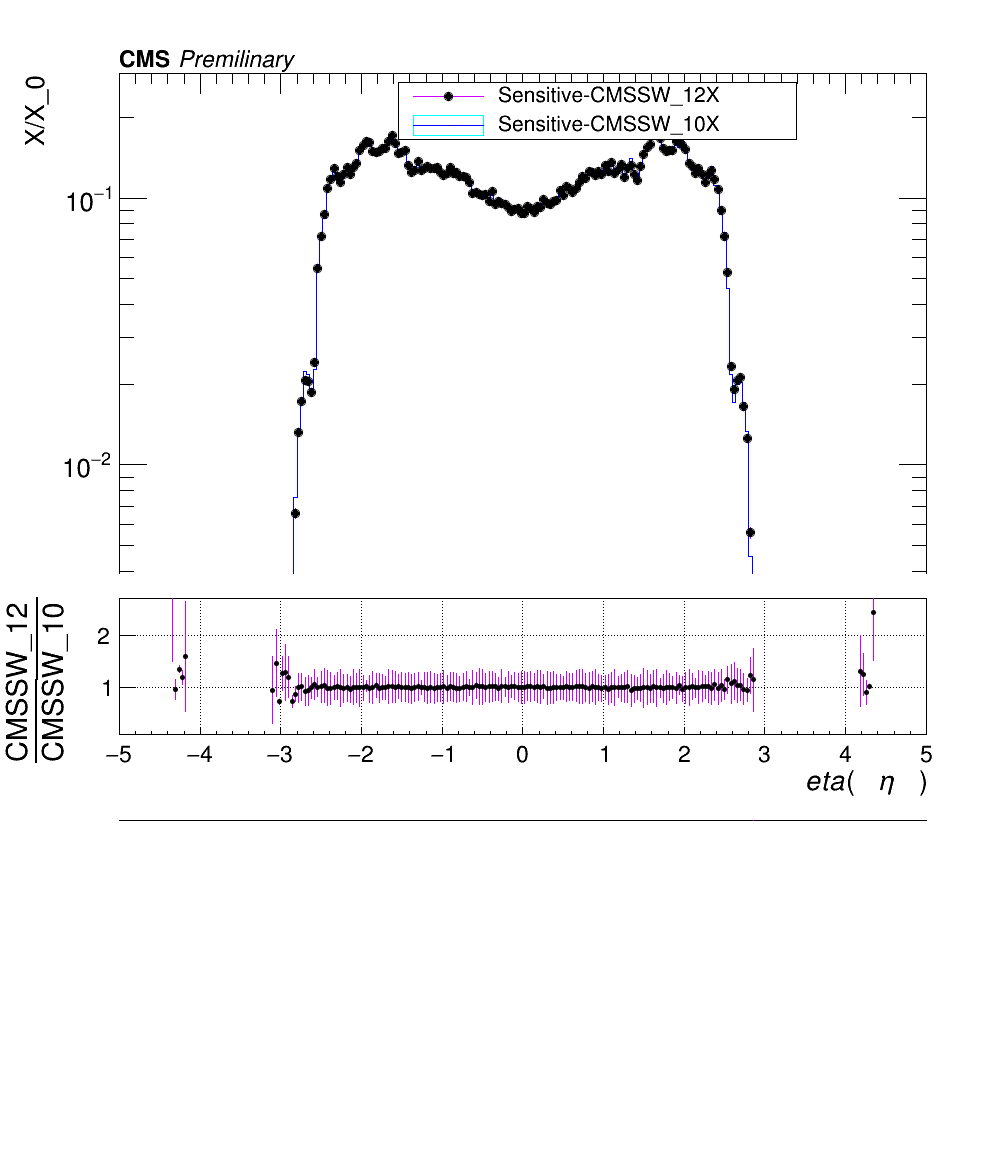

In [18]:
hist_12_cooling = infile_12.Get("210")
hist_10_cooling = infile_10.Get("210")


hist_12_cooling.SetMarkerStyle(20)
hist_12_cooling.SetMarkerSize(1)
hist_12_cooling.SetMarkerColor(kBlack)
hist_12_cooling.SetLineWidth(1)
hist_12_cooling.SetLineColor(kViolet)
# hist_12_cooling.GetYaxis().SetRangeUser(0.001,1)


totalMC= ROOT.TH1F("totalMC", "Events;DNN score;",-5,5,250)
totalMC.Add(hist_10_cooling)
totalMCYield=totalMC.Integral()
DataYield= hist_12_cooling.Integral()
DataMC_scaleF=DataYield/totalMCYield  


hist_10_cooling.Scale(DataMC_scaleF)

hist_10_cooling.SetFillColor(7)
hist_10_cooling.SetLineColor(kBlue);
# hist_10_cooling.GetYaxis().SetRangeUser(0.001, 1)

stack_I = ROOT.THStack("","")
stack_I.Add(hist_10_cooling)



hRatio = hist_12_cooling.Clone("hRatio");
hRatio.Reset();
hRatio.Add(hist_12_cooling);
hRatio.Divide(hist_10_cooling);
hRatio.SetStats(0);
hRatio.SetMarkerStyle(20);
hRatio.SetMarkerSize(1);
hRatio.SetTitle("");


hRatio.GetYaxis().SetRangeUser(0.1,2.7);
hRatio.GetYaxis().SetTitleOffset(0.4);
hRatio.GetYaxis().SetTitleSize(0.13);
hRatio.GetXaxis().SetTitleSize(0.12);
hRatio.GetXaxis().SetLabelSize(0.10);
hRatio.GetYaxis().SetLabelSize(0.10);
hRatio.GetYaxis().SetTitle("#frac{CMSSW_12}{CMSSW_10}");
hRatio.GetXaxis().SetTitle("eta($\eta$)");
hRatio.GetXaxis().SetLabelOffset(0.035);
hRatio.GetYaxis().SetLabelOffset(0.01);
hRatio.GetYaxis().SetNdivisions(5);
hRatio.SetMarkerStyle(19);
hRatio.SetMarkerSize(0.5);
hRatio.SetMarkerColor(kBlack);
# hRatio.Fit("pol1")   #It shows the fit 

c1 = ROOT.TCanvas('c1',"",1000,1200)
pad1 = ROOT.TPad("pad1","pad1",0,0.3,1.0,1.0);
pad1.SetTopMargin(0.090);
pad1.SetBottomMargin(0);
pad1.SetLeftMargin(0.120);
pad1.SetRightMargin(0.070);
pad1.SetLogy();
pad1.SetTickx();
pad1.SetTicky();
pad1.Draw();
pad1.cd();

tex1 = ROOT.TLatex(0.12, 0.94, "#bf{CMS} #it{Premilinary}")
tex1.SetNDC()
tex1.SetTextAlign(13)
tex1.SetTextFont(42)
tex1.SetTextSize(0.03)
tex1.SetLineWidth(2)

tex2 = ROOT.TLatex(0.72, 0.94, "137 fb^{-1} (13 TeV)")
tex2.SetNDC()
tex2.SetTextAlign(13)
tex2.SetTextFont(42)
tex2.SetTextSize(0.03)
tex2.SetLineWidth(2)

stack_I.Draw("hist")
stack_I.GetYaxis().SetTitle("X/X_0");
# stack_I.GetYaxis().SetRangeUser(0.001, 1)
stack_I.SetMaximum(0.2)
stack_I.SetMinimum(0.001)

hist_12_cooling.Draw("E0 x0 SAME")

# Legend drawing
legend = ROOT.TLegend()
legend = ROOT.TLegend(0.40,0.83,0.80,0.90)
legend.AddEntry(hist_12_cooling, "Sensitive-CMSSW_12X")
legend.AddEntry(hist_10_cooling, "Sensitive-CMSSW_10X")

# canvas.SetLogy()
legend.Draw()
# canvas.Draw()

tex1.Draw()



pad2 = TPad("pad2","pad2",0,0,1,0.3);
pad2.SetTopMargin(0.1);
pad2.SetLeftMargin(0.120);
pad2.SetRightMargin(0.070);
pad2.SetBottomMargin(0.35);
pad2.SetGridy();
pad2.SetGridx();
pad2.Draw();
pad2.cd();

hRatio.Draw("E0 x0");
c1.Draw()
c1.SaveAs("/eos/user/s/sraj/Work_/CUA_20--/Project_Material_Validation_V1/Comparision_CMSSW-10_&_CMSSW-12/Geometry2016/Sensitive_comaprision_CMSSW_10&12.pdf")
c1.SaveAs("/eos/user/s/sraj/Work_/CUA_20--/Project_Material_Validation_V1/Comparision_CMSSW-10_&_CMSSW-12/Geometry2016/Sensitive_comaprision_CMSSW_10&12.png")

# Ratio Plot for Support

Warning in <TFile::Append>: Replacing existing TH1: totalMC (Potential memory leak).
Warning in <TH1::TH1>: nbins is <=0 - set to nbins = 1
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file /eos/user/s/sraj/Work_/CUA_20--/Project_Material_Validation_V1/Comparision_CMSSW-10_&_CMSSW-12/Geometry2016/Support_comaprision_CMSSW_10&12.pdf has been created
Info in <TCanvas::Print>: png file /eos/user/s/sraj/Work_/CUA_20--/Project_Material_Validation_V1/Comparision_CMSSW-10_&_CMSSW-12/Geometry2016/Support_comaprision_CMSSW_10&12.png has been created


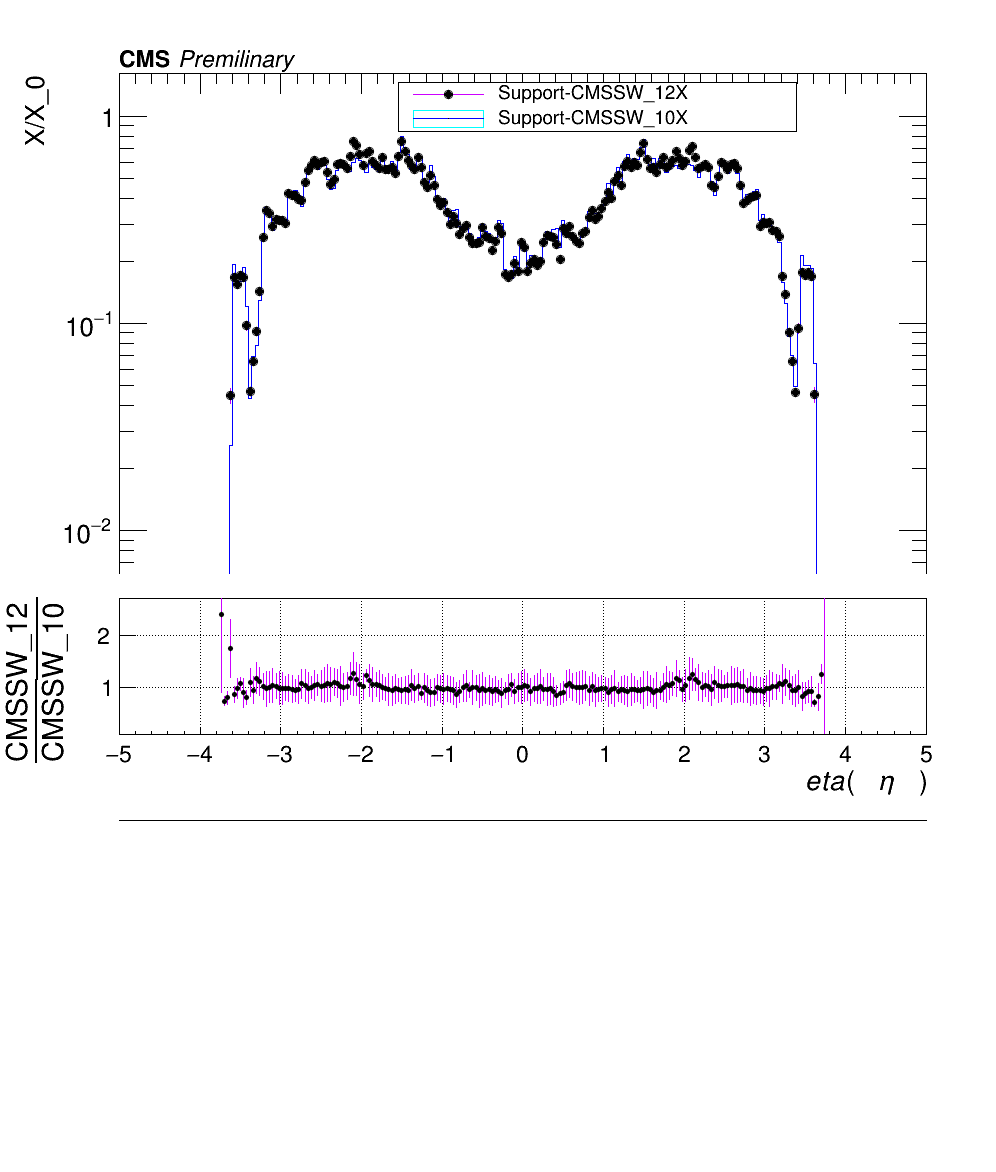

In [19]:
hist_12_cooling = infile_12.Get("110")
hist_10_cooling = infile_10.Get("110")


hist_12_cooling.SetMarkerStyle(20)
hist_12_cooling.SetMarkerSize(1)
hist_12_cooling.SetMarkerColor(kBlack)
hist_12_cooling.SetLineWidth(1)
hist_12_cooling.SetLineColor(kViolet)
# hist_12_cooling.GetYaxis().SetRangeUser(0.001,1)


totalMC= ROOT.TH1F("totalMC", "Events;DNN score;",-5,5,250)
totalMC.Add(hist_10_cooling)
totalMCYield=totalMC.Integral()
DataYield= hist_12_cooling.Integral()
DataMC_scaleF=DataYield/totalMCYield  


hist_10_cooling.Scale(DataMC_scaleF)

hist_10_cooling.SetFillColor(7)
hist_10_cooling.SetLineColor(kBlue);
# hist_10_cooling.GetYaxis().SetRangeUser(0.001, 1)

stack_I = ROOT.THStack("","")
stack_I.Add(hist_10_cooling)



hRatio = hist_12_cooling.Clone("hRatio");
hRatio.Reset();
hRatio.Add(hist_12_cooling);
hRatio.Divide(hist_10_cooling);
hRatio.SetStats(0);
hRatio.SetMarkerStyle(20);
hRatio.SetMarkerSize(1);
hRatio.SetTitle("");


hRatio.GetYaxis().SetRangeUser(0.1,2.7);
hRatio.GetYaxis().SetTitleOffset(0.4);
hRatio.GetYaxis().SetTitleSize(0.13);
hRatio.GetXaxis().SetTitleSize(0.12);
hRatio.GetXaxis().SetLabelSize(0.10);
hRatio.GetYaxis().SetLabelSize(0.10);
hRatio.GetYaxis().SetTitle("#frac{CMSSW_12}{CMSSW_10}");
hRatio.GetXaxis().SetTitle("eta($\eta$)");
hRatio.GetXaxis().SetLabelOffset(0.035);
hRatio.GetYaxis().SetLabelOffset(0.01);
hRatio.GetYaxis().SetNdivisions(5);
hRatio.SetMarkerStyle(19);
hRatio.SetMarkerSize(0.5);
hRatio.SetMarkerColor(kBlack);
# hRatio.Fit("pol1")   #It shows the fit 

c1 = ROOT.TCanvas('c1',"",1000,1200)
pad1 = ROOT.TPad("pad1","pad1",0,0.3,1.0,1.0);
pad1.SetTopMargin(0.090);
pad1.SetBottomMargin(0);
pad1.SetLeftMargin(0.120);
pad1.SetRightMargin(0.070);
pad1.SetLogy();
pad1.SetTickx();
pad1.SetTicky();
pad1.Draw();
pad1.cd();

tex1 = ROOT.TLatex(0.12, 0.94, "#bf{CMS} #it{Premilinary}")
tex1.SetNDC()
tex1.SetTextAlign(13)
tex1.SetTextFont(42)
tex1.SetTextSize(0.03)
tex1.SetLineWidth(2)

tex2 = ROOT.TLatex(0.72, 0.94, "137 fb^{-1} (13 TeV)")
tex2.SetNDC()
tex2.SetTextAlign(13)
tex2.SetTextFont(42)
tex2.SetTextSize(0.03)
tex2.SetLineWidth(2)

stack_I.Draw("hist")
stack_I.GetYaxis().SetTitle("X/X_0");
# stack_I.GetYaxis().SetRangeUser(0.001, 1)
stack_I.SetMaximum(1.0)


hist_12_cooling.Draw("E0 x0 SAME")

# Legend drawing
legend = ROOT.TLegend()
legend = ROOT.TLegend(0.40,0.84,0.80,0.90)
legend.AddEntry(hist_12_cooling, "Support-CMSSW_12X")
legend.AddEntry(hist_10_cooling, "Support-CMSSW_10X")

# canvas.SetLogy()
legend.Draw()
# canvas.Draw()

tex1.Draw()



pad2 = TPad("pad2","pad2",0,0,1,0.3);
pad2.SetTopMargin(0.1);
pad2.SetLeftMargin(0.120);
pad2.SetRightMargin(0.070);
pad2.SetBottomMargin(0.35);
pad2.SetGridy();
pad2.SetGridx();
pad2.Draw();
pad2.cd();

hRatio.Draw("E0 x0");
c1.Draw()
c1.SaveAs("/eos/user/s/sraj/Work_/CUA_20--/Project_Material_Validation_V1/Comparision_CMSSW-10_&_CMSSW-12/Geometry2016/Support_comaprision_CMSSW_10&12.pdf")
c1.SaveAs("/eos/user/s/sraj/Work_/CUA_20--/Project_Material_Validation_V1/Comparision_CMSSW-10_&_CMSSW-12/Geometry2016/Support_comaprision_CMSSW_10&12.png")